# 그래프 한글 깨짐 현상 해결방법

In [ ]:
#1
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

구글 코랩에서 그래프 한글 깨짐 현상 방지

나눔폰트 설치 -> 런타임 재시작 -> matplotlib 폰트를 나눔글꼴로 바꿔줌

In [1]:
#3
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 워드 클라우드

In [16]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.0 MB/s 
     |████████████████████████████████| 453 kB 55.7 MB/s 


In [17]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt

In [5]:
doc = """애플이 정부의 지원을 받는 해킹에서 저명 인사를 보호하기 위해 올가을 아이폰과 아이패드, 맥 컴퓨터 등에 '록다운 모드'를 도입한다고 밝혔다고 경제매체 CNBC가 6일(현지시간) 보도했다.
록다운 모드가 되면 아이폰에서 일부 기능이 꺼져 해커가 접근하거나 해킹할 수 있는 기능이 크게 줄면서 아이폰이 스파이웨어에 덜 취약해진다.
구체적으로는 아이메시지의 미리 보기 기능, 애플의 웹브라우저인 사파리의 자바스크립트 제한, 신규 설정 프로필 설치 차단, 유선 연결 차단, 화상통화인 페이스타임 등 수신형 서비스 요청 차단 등이다.
애플은 앞서 작년 9월 아이폰과 맥 컴퓨터 등에 중대한 보안 취약점이 있다며 긴급 소프트웨어 업데이트를 내놓은 바 있다.
이스라엘의 보안기업 NSO그룹이 만든 스파이웨어 '페가수스'를 이용하면 해커들이 클릭 한번 없이도 애플 기기를 감염시켜 카메라나 마이크를 켜고 검색 기록, 문자 메시지나 이메일 내용 등이 노출될 수 있다는 이유에서였다.
페가수스 같은 고도의 스파이웨어는 가격이 수천억원에 달해 평범한 해커가 아닌 정부나 경찰 기관 등이 주요 고객이다.
애플은 이 사건 뒤 미국 의회와 각국 정부에서 이 문제를 해결하라는 압력을 받아왔다.
록다운 모드는 국가의 지원을 받는 해커의 표적이 될 수 있어 극도로 고도의 보안 수준이 요구되는 소수의 이용자를 위한 것이다. 여기에는 고위 정치인이나 언론인, 인권 활동가, 기업 임원 등이 포함된다.
애플은 "대다수 이용자는 고도의 사이버 공격의 희생자가 될 일이 결코 없겠지만 희생자가 될 수 있는 소수의 사람을 보호하기 위해 쉬지 않고 일하겠다"고 밝혔다.
애플은 록다운 모드에 혹시 있을지 모를 보안상 허점을 발견하는 사람에게 최고 200만달러(약 26억원)를 지급하겠다며 '현상금'까지 내걸었다."""

In [18]:
okt = Okt()
nouns = okt.nouns(doc)

c = Counter(nouns)

In [10]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
  if 'NanumBarunGothic' in f.name:
    print(f.fname)

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


In [13]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font_path, background_color='white')

In [21]:
c

Counter({'가격': 1,
         '각국': 1,
         '감염': 1,
         '거나': 1,
         '검색': 1,
         '것': 1,
         '결코': 1,
         '경제': 1,
         '경찰': 1,
         '고': 1,
         '고객': 1,
         '고도': 3,
         '고위': 1,
         '공격': 1,
         '구체': 1,
         '국가': 1,
         '그룹': 1,
         '극도': 1,
         '기관': 1,
         '기기': 1,
         '기능': 3,
         '기록': 1,
         '기업': 2,
         '긴급': 1,
         '내': 1,
         '내용': 1,
         '노출': 1,
         '다운': 4,
         '대다수': 1,
         '덜': 1,
         '도입': 1,
         '뒤': 1,
         '등': 7,
         '록': 4,
         '를': 3,
         '마이크': 1,
         '매체': 1,
         '맥': 2,
         '메시지': 1,
         '모드': 4,
         '문자': 1,
         '문제': 1,
         '미국': 1,
         '미리': 1,
         '바': 1,
         '발견': 1,
         '보기': 1,
         '보도': 1,
         '보안': 4,
         '보호': 2,
         '사건': 1,
         '사람': 2,
         '사이버': 1,
         '사파리': 1,
         '서비스': 1,
         '설정':

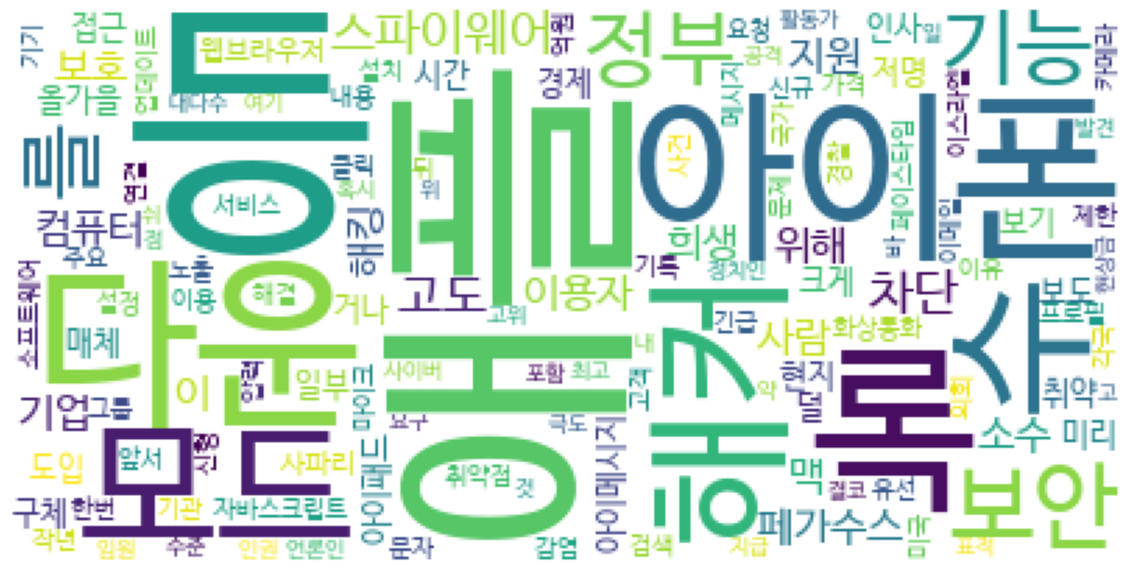

In [20]:
wc.generate_from_frequencies(c)

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(wc)
plt.show()